# Optimization  Notes

> "In this post we'll go over Gradient based optimization. Understanding gradient based optimization methiods is very important if someone needs to become an expert in Deep Learning. I'll start by a quick refresher on univariate and multivariate optimization followed by a brief overview of some of the Gradient based optimization methods."

- toc: true
- branch: fastbook/lessons
- badges: true
- comments: true
- categories: [optimization]
- hide: false
- author: Akash Mehra

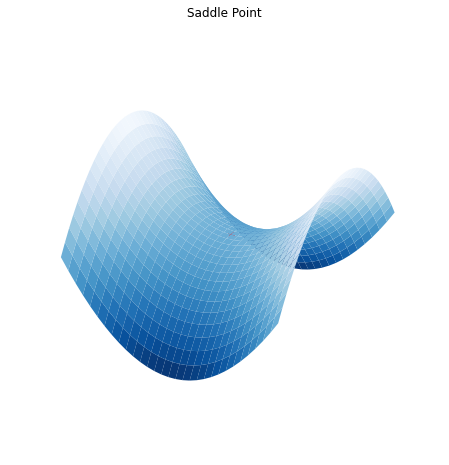

In [1]:
#collapse-hide
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
plot_args = {'rstride': 1, 'cstride': 1, 'cmap':"Blues_r",
             'linewidth': 0.4, 'antialiased': True,
             'vmin': -1, 'vmax': 1}

x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2

ax.plot_surface(x, y, z, **plot_args)
ax.plot([0], [0], [0], 'ro')
ax.grid()
plt.axis('off')
ax.set_title("Saddle Point")
plt.show()

<figure>
  <figcaption align="center">Image Credit: By Nicoguaro - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=20570051 </figcaption>
</figure>

### Optimization basics

#### Univariate Optimality Conditions: Quick recap

Consider a function $f(x)$​, where $x$​ is univariate, the necessary conditions for a point $x=x_0$​ to be a minimum  of $f(x)$​  with respect to its *infinitesimal locality* are: $f'(x_0) = 0$​ and $f''(x_0) > 0$​. The optimality conditions can be well undertsood if we look at the *Taylor Series* expansion of $f(x)$​ in the small vicinty of $x_0 + \Delta$​.
$$
f(x_0 + \Delta) \approx f(x_0) + \Delta f'(x) + \frac{\Delta^2}{2} f''(x)
$$
Here, the value of $\Delta$​ is assumed to be very small. One can see that if $f'(x) = 0$​ and $f''(x) > 0$​ then $f(x_0 + \Delta) \approx f(x_0) + \epsilon$​​, which means that $f(x_0) < f(x_0 + \Delta)$​, for small values of $\Delta$​ (whether it is positive or negative) or $x_0$​ is a minimum wrt to its immediate locality.

#### Multivariate Optimality Conditions

Consider a function $f(x)$ where $x$ is an n-dimensional vector given by $\begin {bmatrix}x_1, x_2, x_3, \cdots, x_n \end {bmatrix}^T$. The *gradient vector* of $f(x)$ is 

given by the partial derivatives wrt to each of the components of $x$, $\nabla {f{x}} \equiv g(x) \equiv \begin {bmatrix} 
\frac{\partial f}{\partial x_1}\\
\frac{\partial f}{\partial x_2}\\
\frac{\partial f}{\partial x_3}\\
\vdots \\
\frac{\partial f}{\partial x_n}\\
\end{bmatrix}$ 

Note that the *gradient* in case of a *multivariate* functions is vector of *n-dimensions*. Similarly, one can define the *second derivative* of a *multivariate* function using a matrix of size $n \times n$​
$$
\nabla^2f(x)\equiv H(x) \equiv 
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_{1}^2} &  \cdots & 
\frac{\partial^2 f}{\partial x_{1}\partial x_{n}}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_{n}\partial x_{1}} & \cdots & 
\frac{\partial^2 f}{\partial x_{n}^2}\\
\end{bmatrix}
$$
Here, $H(x)$​​​​ is called a *Hessian Matrix*, and if the partial derivatives ${\partial^2 f}/{\partial x_{i}\partial x_{j}}$​​​​​ and ${\partial^2 f}/{\partial x_{j} \partial x_{i}}$​​​​​  are both defined and continuous and then by *Clairaut's Theorem* $\partial^2 f/\partial x_{i}\partial x_{j}$​​​​​​​ = $\partial^2 f/\partial x_{j}\partial x_{i}$​​​​​,​​ this second order *partial derivative* matrix becomes symmetric. 

If $f$​ is **quadratic** then the *Hessian* becomes a constant, the function can then be expressed as: $f(x) = \frac{1}{2}x^THx + g^Tx + \alpha$​ , and as in case of *univariate* case the optimality conditions can be derived by looking at the *Taylor Series* expansion of $f$​ about $x_0$: 
$$
f(x_0 + \epsilon\overline{v}) = f(x_0) + \epsilon \overline{v}^T \nabla f(x_0) + \frac {\epsilon^2}{2} \overline{v}^T H(x_0 + \epsilon \theta \overline{v}) \overline{v}
$$
where $0 \leq \theta \leq 1$​, $\epsilon$​ is a *scalar* and $\overline{v}$​ is an *n-dimensional* vector. Now, if $\nabla f(x_0) = 0$​, then it leaves us with $f(x_0) + \frac{\epsilon^2}{2} \overline{v}^T H \overline{v}$​, which implies that for the $x_0$​ to be a point of minima,  $\overline{v}^T H \overline{v}> 0$​​ or the *Hessian* has to be *positive definite*. 

> Quick note on definiteness of the symmetric Hessian Matrix

* $H$ is *positive definite* if $\mathbf{v}^TH \mathbf{v} > 0$, for all *non-zero vectors* $\mathbf{v} \in \mathbb{R}^n$ (all *eigenvalues* of $H$ are *strictly positive*)
* $H$ is *positive semi-definite* if $\mathbf{v}^TH \mathbf{v} \geq 0$, for all *non-zero vectors* $\mathbf{v} \in \mathbb{R}^n$ (*eigenvalues* of $H$ are *positive* or *zero*)
* $H$ is *indefinite* if there exists a  $\mathbf{v}, \mathbf{u} \in \mathbb{R}^n$, such that $\mathbf{v}^TH \mathbf{v} > 0$ and $\mathbf{u}^T H \mathbf{u} < 0$ (*eigenvalues* of $H$ have mixed sign)
* $H$ is *negative definite* if $\mathbf{v}^TH \mathbf{v} < 0$, for all *non-zero vectors* $\mathbf{v} \in \mathbb{R}^n$ (all *eigenvalues* of $H$ are *strictly negative*)

### Gradient based optimization

Gradient based optimization is a technique to minimize/maximize the function by updating the paremeters/weights of a model using the gradients of the Loss wrt to the parameters. If the Loss function is denoted by $E(w)$​​​​​​​​, where $w$​​​​​​​​ are the parameters then we'd like to calculate $\nabla_{w} E(\mathbb{w})$​​​​​​​​ and to get the parameters for the next iteration, we'd like to perform the  $\mathbb{w}_{t+1} = \mathbb{w}_{t} - \eta * \nabla_{\mathbb{w}} E(\mathbb{w}_{t})$​​​​​, where  $\eta$​​​​​​​​​ is the learning rate. 

> In order to update the parameters of a Machine Learning model we need a way for us to measure the rate of change in the output when the inputs (the parameters) are changed.

Here, we've assumed that the function $E(\mathbb{w})$​​​​ is continuous. The function $E(\mathbb{w})$​​​ can have kinks in which case we'll call the *gradient* a *subgradient*. *Subgradient* generalizes the notion of a derivative to functions that are not necessirily differentiable. More on *subgradients* will follow in a separate post, but for now assume that there exists a concept using which one can calculate the *gradient* of a function that is not differentiable everywhere (has kinks, for example: `ReLU` non-linearity).

There are many gradient based optimization algorithms that exist and they differ mainly in how the gradients are calculated or how the learning rate $\eta$​​ is chosen. We'll look at some of those algorithms that are used in practice. 

### Need for Gradient Descent

One of the necessary conditions for a point to be a critical point (minima, maxima or saddle) is that the first order derivate $f'(x) = 0$​, it is often the case that we're not able to exactly solve this equation because the derivative can be a complex function of $x$​. A *closed form solution* so to speak, doesn't exist and things get even more complicated in *multivariate* case due to compultational and numerical challenges<sup>[1]</sup>. We use *Gradient Descent* to iteratively solve the optimization problem irrespective of the functional form of $f(x$​) by taking a step in the direction of the steepest descent (because in Machine Learning we're optimizing a *Loss* or a *Cost* function, we tend to always solve the optimization problem from the perspective of *minimization*).

### Convergence of Gradient Descent

We also need to talk about the convergence of Gradient Descent before we can dive into different types of gradient based methods. Let's look at the update equation once again: $\mathbb{w}_{t+1} = \mathbb{w}_{t} - \eta \frac{\partial  E(\mathbb{w})}{\partial \mathbb{w}}$​​​​​​, to see the effect of learning rate in *univariate* case let's take a look athe following figures: 

<figure> <img src="images/optimization/effects_of_learning_rate.png" align="center" alt="Gradient Descent for different learning rates" /><figcaption align="center">Source: Efficient Backprop, Lecun et al. 98</figcaption></figure>

$\eta_{opt}$​​​ is the optimal learning rate, and we can see in *a)* if our chosen learning rate $\eta < \eta_{opt}$​​​ then converges will happen at a slower pace, in *(b* we see that when $\eta = \eta_{opt}$​​​ then we just converge right away and for $\eta_{opt} < \eta < 2\eta_{opt}$​​​ the weights oscilate around the minimum but evenbtually converge. Things get difficult in case where $\eta > 2\eta_{opt}$​​​​, when this happens, weights diverge. We also need to find out the value of $\eta_{opt}$​​​, and to do so we need to write out the *Taylor Series* expansion of our function $E(\mathbb{w})$​​​ about current weight $\mathbb{w}_{c}$​. As we know from [Section 1.2](#markdown-header-multivariate-optimality-conditions)​, we could expand our function as:
$$
E(\mathbb{w}) = E(\mathbb{w}_{c}) - (\mathbb{w} - \mathbb{w}_{c}) \frac {\partial E(\mathbb{w})}{\partial \mathbb{w}} + \frac{1}{2} (\mathbb{w} - \mathbb{w}_{c})^2 \frac {\partial^2 E(\mathbb{w})}{\partial \mathbb{w}^2}  + \cdots,
$$
as before, if $E(\mathbb{w})$​ is quadratic then we're left with only the first and second order terms. Differentiating both sides wrt w and noting that higher order terms will vanish as the second order derivative itself is a constant, we're left with:
$$
\frac {\partial E(\mathbb{w})}{\partial \mathbb{w}} = \frac {\partial E(\mathbb{w_{c}})}{\partial \mathbb{w}} + (\mathbb{w} - \mathbb{w}_{c}) \frac {\partial^2 E(\mathbb{w})}{\partial \mathbb{w}^2}
$$
Now setting $\mathbb{w} = \mathbb{w}_{min}$​​ and noting that $\frac {\partial E(\mathbb{w}_{min})}{\partial \mathbb{w}} = 0$, we get 
$$
(\mathbb{w}_{c} - \mathbb{w}_{min}) \frac {\partial^2 E(\mathbb{w})}{\partial \mathbb{w}^2} =  \frac {\partial E(\mathbb{w_{c}})}{\partial \mathbb{w}} \implies \boxed {\mathbb{w}_{min} = \mathbb{w}_{c} - \left(\frac {\partial^2 E(\mathbb{w})}{\partial \mathbb{w}^2} \right)^{-1} \frac {\partial E(\mathbb{w_{c}})}{\partial \mathbb{w}}}
$$
The *boxed* equation looks a lot familiar, it turns out that it's our weight update equation which tells us that we can reach the minimum in one step if we set $\eta_{opt} = \left(\frac {\partial^2 E(\mathbb{w})}{\partial \mathbb{w}^2} \right)^{-1} $​, one extending this *multivariate* case we get $\eta_{opt} = H^{-1}(\mathbb{w})$​​. 

This takes us to the *Newton* based methods (a type of gradient based optimization). Note how we don't have to rey on a *hyperparameter* like the *learning rate* if we could somehow compute the inverse of the *Hessian* matrix. Multiplying the gradient vector with the inverse of the *Hessian* takes smaller steps in the direction of steep curvatire but takes larger steps in the direction of shallow curvature. Although, in theory it sounds nice but it's often very hard to compute the inverse of the *Hessian* for most practical situations. Algorithms like *L-BFGS* exist that reduce the memory requirements needed for *Newton* based methods but in practice we hardly see them applied in training *Deep Neural Networks*. 

For more on the convergence theory, please read *Section 5* of [Efficient Backprop](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf) by Yann LeCun.

### Gradient Descent and its variants

 in this section I'll cover a few common variants of Gradient Descent that are most commonly used in practice, a more comprehensive treatment on the topic is convered in [[2](#ruder_overview_optim)] and it's an amazing text to refer.

#### Stochastic Gradient Descent (SGD)

The variant of *Gradient Descent* that we've seen so far is commonly known as *Batched Gradient Descent*, which requires us to calculate the *gradients* at each step by considering the whole dataset. As an alternate one can just use one example chosen at random from the whole dataset to calculate the gradient as well. This gradient albiet noisy, leads to better solutions. In code it looks something like this 

```python
for epoch in range(num_epochs):
  np.random.shuffle(data)
  for x,y in data:
    grads = eval_grads(loss, params, x, y)
    params -= learning_rate * grads
```

Here, the tuple `x,y` is one example, label pair samped from the dataset. Note that as previously mentioned, the updates performed using one example are very noisy. A graph of SGD fluctuation is follows: 

<figure>
  <p align="center" width="100%">
	  <img src="images/optimization/SGD.png" alt="Stochastic Gradient Descent Oscillations" class="center" />
  </p>
  <figcaption align="center">Source: 
    <a link="https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png">Wikipedia</a> 	 </figcaption>
</figure>



With *Batched Gradient Descent*, it converges to the minima of the basin where the weights were initialized, whereas with *Stochastic Gradient Descent*, due to the noisy nature of the updates, the weights can potentially jump out of the basin and find a better minima. One thing to note is that this noise can make the convergence a lot slower as well as the weights can keep overshooting the minima, but it has been shown that on slowly annealing the learning rate, one can converge to a minima. Please see [[1]](#efficient_backprop)

#### Mini-batch Gradient Descent

*Mini Batch Gradient Descent* is a good middle ground between the more expensive *Batched* version and the noisier *Stochastic* version of Gradient Descent. In this version, instead of sampling one exa,mple at random at a time, we sample a *mini batch* of a pre-defined size (which is a *hyper-parameter*). The benefit of this method is that it can help reduce the *variance* of the parameter updates (there by making the updates less noisy and having less *oscialltions*), it can also help us leverage the *state of the art* Deep Learning software libraries that have an efficient way of calculating radients for *mini batches*

Again, in code it looks something like this:

```python
for epoch in range(num_epochs):
  batch_generator = BatchGenerator(batch_size=64)
  for batch in batch_generator:
    grads = eval_grads(loss, params, batch)
    params -= learning_rate * params
    
```

As pointed by [[2](#ruder_overview_optim)], choosing the right learning rate can be very difficult, and even though learning rate schedules can help (annealing the learning rate using a pre-defined schedule), these schedules don't adapt as the training prgresses. 

> In 2015 the researcher Leslie Smith came up with the *learning rate finder*. The idea was to start with a very, very small learning rate and use that for one mini-batch, find what the losses are afterwards, and then increase the learning rate by some percentage (e.g., doubling it each time). Then take a pass over another mini-batch, track the loss, and double the learning rate again. This is done until the loss gets worse, instead of better. 

#### SGD with Momentum

Momentum is one way to help *SGD* converge faster by accelrating in the relevant directions and reducing the oscillations (which are a result of gradients of components point in different directions). 

##### Exponentially Moving Averages

Before we build up the equations for *momentum* based updates in *SGD* let's do a quick review of *Exponentially weighted averages*. Given a signal, one can compute the *Exponentially weighted average* given a parameter $\beta$ using the following equation:
$$
\mathcal{V}_{t} = \beta \cdot \mathcal{V}_{t-1} + (1-\beta)\cdot \mathcal{\theta}_{t}
$$
Where $\mathcal{\theta}_{t}$ is the current value of the signal. We can use plot this in python code as well:

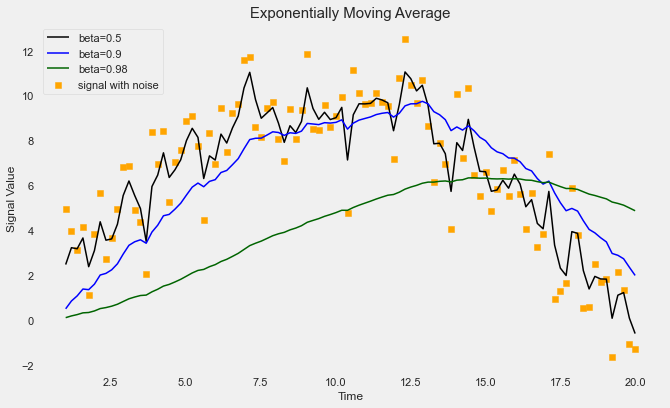

In [2]:
#collapse-hide
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_theme()  

def get_signal(time):
    x_volts = 10*np.sin(time/(2*np.pi))
    x_watts = x_volts ** 2
    # Calculate signal power and convert to decibles
    sig_avg_watts = np.mean(x_watts)
    return x_volts, x_watts, 10 * np.log10(sig_avg_watts)

def get_noise(sig_avg_db, target_snr_db):
    # Calculate noise according to SNR = P_signal - P_noise 
    # then convert to watts
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    return 0, noise_avg_watts
  
def moving_average(data, beta=0.9):
    v = [0]
    for idx, value in enumerate(data):
        v.append(beta * v[idx] + (1-beta) * value)
    return np.asarray(v)
  
t = np.linspace(1, 20, 100)
# Set a target SNR
target_snr_db = 12
x_volts, x_watts, sig_avg_db = get_signal(t)
mean_noise, noise_avg_watts = get_noise(sig_avg_db, target_snr_db)
noise_volts = np.random.normal(mean_noise, 
                               np.sqrt(noise_avg_watts), 
                               len(x_volts))
# Noise up the original signal
y_volts = x_volts + noise_volts

plt.style.use('fivethirtyeight')
# Plot signal with noise
fig, ax = plt.subplots(figsize=(10,6))
for beta, color in [(0.5, 'black'), (0.9, 'blue'), (0.98,'darkgreen')]:
    y_avg = moving_average(y_volts, beta=beta)
    ax.plot(t, y_avg[1:], label=f'beta={beta}', 
            color=color, linewidth=1.5)
ax.scatter(t, y_volts, label='signal with noise', 
           color='orange', marker='s')

ax.legend(loc='upper left')
ax.grid(False)

plt.title('Exponentially Moving Average', fontsize=15)
plt.ylabel('Signal Value', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.show()

We can see the effect of the variable $\beta$​ on the smoothness of the curve, the green curve corresponding to $\beta = 0.98$​ is smoother and shifted right because it's slow to account for the change in the current signal value, recall that the equation for the *Exponentially Moving Average* is: $\mathcal{V}_{t} = \beta \cdot \mathcal{V}_{t-1} + (1-\beta)\cdot \mathcal{\theta}_{t}$​ and a higher $\beta$​ means that we're paying more attention to past values than the current one.

> Now what does this have to do with *SGD* or *Momentum*?

The parameter update equation for *SGD with Momentum* is as follows:

$$
\mathcal{V}_{t} = \beta \cdot \mathcal{V}_{t-1} + (1-\beta) \cdot \nabla_{\mathbb{w}} E(\mathbb{w}_{t})
$$

$$
\mathbb{w}_{t+1} = \mathbb{w}_{t} - \eta * \mathcal{V}_{t}
$$

In some implementations we just omit the $1-\beta$ term and simply use the following:

$$
\mathcal{V}_{t} = \beta \cdot \mathcal{V}_{t-1} + \eta \cdot \nabla_{\mathbb{w}} E(\mathbb{w}_{t})
$$

$$
\mathbb{w}_{t+1} = \mathbb{w}_{t} - \mathcal{V}_{t}
$$



where, $\mathcal{V}_{t}$ is the *Exponentially Moving Average*. 

With *momentum* update like above, the parameters will build up the velocity in direction that has consistent gradient. The variable $\beta$​ can be interpreted as *coefficient of friction* which has a dampening effect on an object moving at a certain velocity. This variable reduces the Kinetic Energy of the system, which would otherwise never come to a stop.

#### Nesterov Momentum

The idea behind *Nesterov Momentum* is to *lookahead* at the value of the weights in the basin where we'll end up at if we had applied the *momentum* update. So, instead of using $\mathbb{w}_{t}$​​ we apply the *momentum update* to calculate $\mathbb{w}_{t}^{ahead} = \mathbb{w}_{t} - \beta \cdot \mathcal{V}_{t} $​​ and use this value to calculate the gradient and perform the update, reason being that we're going to land in the vicity of  this point anyway, and being approximately there gives us a better estimate of the updates.

$$
\mathbb{w}_{t}^{ahead} = \mathbb{w}_{t} - \beta \cdot \mathcal{V}_{t}
$$

$$
\mathcal{V}_{t} = \beta \cdot \mathcal{V}_{t-1} + \eta \cdot \nabla_{\mathbb{w}} E(\mathbb{w}_{t}^{ahead})
$$

$$
\mathbb{w}_{t+1} = \mathbb{w}_{t} - \mathcal{V}_{t}
$$

$$
$$

<figure>
  <p align="center" width="100%">
	  <img src="images/optimization/nesterov.jpeg" alt="Nesterov Momentum Update" class="center" />
  </p>
  <figcaption align="center">Source: <a href="https://cs231n.github.io/neural-networks-3/#sgd">CS231n</a></figcaption>
</figure>



I'll stop here for now and talk about *RMSProp*, *AdaGrad*, *Adam* in a later post.

### References

<a name="efficient_backprop">[1] [Efficient Backprop by Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)</a>

<a name="ruder_overview_optim">[2] [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants)</a>

<a name="cs231n">[3] [Convolutional Neurak Networks for Visual Recognition](https://cs231n.github.io/neural-networks-3/)</a> 

<a name="lr_schedule">[4] C. Darken, J. Chang and J. Moody, "Learning rate schedules for faster stochastic gradient search," *Neural Networks for Signal Processing II Proceedings of the 1992 IEEE Workshop*, 1992, pp. 3-12, doi: 10.1109/NNSP.1992.253713.</a>

<a name="fastbook">[5] [Fastbook Chapter 5](https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb)</a>

<a name="cyclical_lr">[6] [Leslie N. Smith, Cyclical Learning Rates for Training Neural Networks, arXiv:1506.01186](https://arxiv.org/abs/1506.01186) </a>

<a name="distill">[7] [Why Momentum Really Works](https://distill.pub/2017/momentum/)</a>

<a name="coursera">[8] [Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization](https://www.coursera.org/learn/deep-neural-network/home/week/2)</a>

<a name="lec_notes">[9] [Lecture Notes AA222](http://adl.stanford.edu/aa222/Lecture_Notes_files/AA222-Lecture3.pdf)</a>

<a name="linalg_and+optim_ml">[10] [Linear Algebra and Optimization for Machine Learning](https://www.springer.com/gp/book/9783030403430)</a>

<a name="so_signal_nose">[11] [Adding Noise to a signal in Python](https://stackoverflow.com/a/53688043)</a>